In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta
import seaborn as sns
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize as normalize
import sys
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('output.csv').drop(columns=['Unnamed: 0'])
# df = df.dropna()
# df = df.drop(df.loc[df['Reported'] == 'void'].index, inplace=False)
# df = df.drop(df.loc[df['Reported'] == 'Void'].index, inplace=False)
# df = df.drop(df.loc[df['Reported'] == 'VOID'].index, inplace=False)
# df = df.drop(df.loc[df['Reported'] == 'None'].index, inplace=False)
# df = df.drop(df.loc[df['Reported'] == 'No reports'].index, inplace=False)
# df = df[~df.Reported.str.contains("No Incident Reports")]
# df['Test'] = df.Reported.str.contains(' ')
# df = df.drop(df.loc[df['Test'] == False].index, inplace=False)
# df = df.drop(columns=['Test'])

# df['Date'] = df.apply(lambda x: str(x['Reported']).split(' ')[0], axis=1)
# # df['Time'] = df.apply(lambda x: str(x['Reported']).split(' ')[1], axis=1)
# df.sort_values(by=['Reported'])

In [3]:
removed_columns = ['Unnamed: 0', 'Weeks Since Start', 'Years since start', 'Months since start',
                   'week-composite', 'month-composite', 'Day of month', 'Reported-edited', 'Week_Day',
                   'Month', 'Year']
cleaned = pd.read_csv('output-cleaned.csv').drop(columns=removed_columns)
cleaned['Date'] = pd.to_datetime(cleaned['Date'])
cleaned['Date'] = cleaned['Date'].dt.date
cleaned = cleaned[~cleaned.Incident.str.contains('Domestic')]
cleaned['Incident'] = cleaned["Incident"].str.lower()

In [8]:
def gencolors(num):
    cmap = get_cmap('viridis')
    norm = normalize(vmin=0, vmax=num)
    clist = list()
    for i in range(num):
        clist.append(cmap(norm(i)))
    return clist


def plot_incidents_vs_time(df, incident):

    sdate = df['Date'].min()
    edate = df['Date'].max()
    delta = edate - sdate       # as timedelta
    days = []
    for i in range(delta.days + 1):
        day = sdate + timedelta(days=i)
        days.append(day)
    time_data = pd.DataFrame(columns=['count'], index=days)
    time_data['count'] = 0
    subset = df[df['Incident'].str.contains(incident)]
    value_counts = subset['Date'].value_counts()
    
    prev_val = 0
    for index, row in time_data.iterrows():
        if index in value_counts.index:
            val = prev_val + value_counts[index]
        else:
            val = prev_val
        
        time_data.loc[index, 'count'] = val
        prev_val = val

    plt.plot(time_data.index, list(time_data['count']))
    
    return time_data

# plot_incidents_vs_time(cleaned, 'Battery')
# plot_incidents_vs_time(cleaned, 'Burglary')
# plot_incidents_vs_time(cleaned, 'Robbery')

def plot_incidents_barplot(df, incidents):
    sdate = df['Date'].min()
    edate = df['Date'].max()
    delta = edate - sdate       # as timedelta
    days = []
    for i in range(delta.days + 1):
        day = sdate + timedelta(days=i)
        days.append(day)
    time_data = pd.DataFrame(0, columns=[x for x in incidents], index=days)

    for incident in incidents:
        subset = df[df['Incident'].str.contains(incident)]
        value_counts = subset['Date'].value_counts()

        prev_val = 0
        for index, row in time_data.iterrows():
            if index in value_counts.index:
                val = prev_val + value_counts[index]
            else:
                val = prev_val

            time_data.loc[index, incident] = val
            prev_val = val
        
    min_year = int(sdate.year)
    max_year = int(edate.year)
    years = []
    for year in range(min_year, max_year+1):
        years.append(year)
    
    year_data = pd.DataFrame(0, columns=[x for x in incidents], index=years)
    for incident in incidents:
        subset = df[df['Incident'].str.contains(incident)]
        value_counts = subset['Date'].value_counts()
        for index, value in value_counts.iteritems():
            y = index.year
            year_data.loc[index.year, incident] += value

    year_data.rename(columns=lambda x: x.title(), inplace=True)

    year_data.plot(kind='bar', stacked=True, figsize=(20, 20), color = gencolors(len(incidents)))
    plt.xticks(rotation = 0, color = 'black', size = 10)
    plt.yticks(color = 'black', size = 10)
    plt.show()

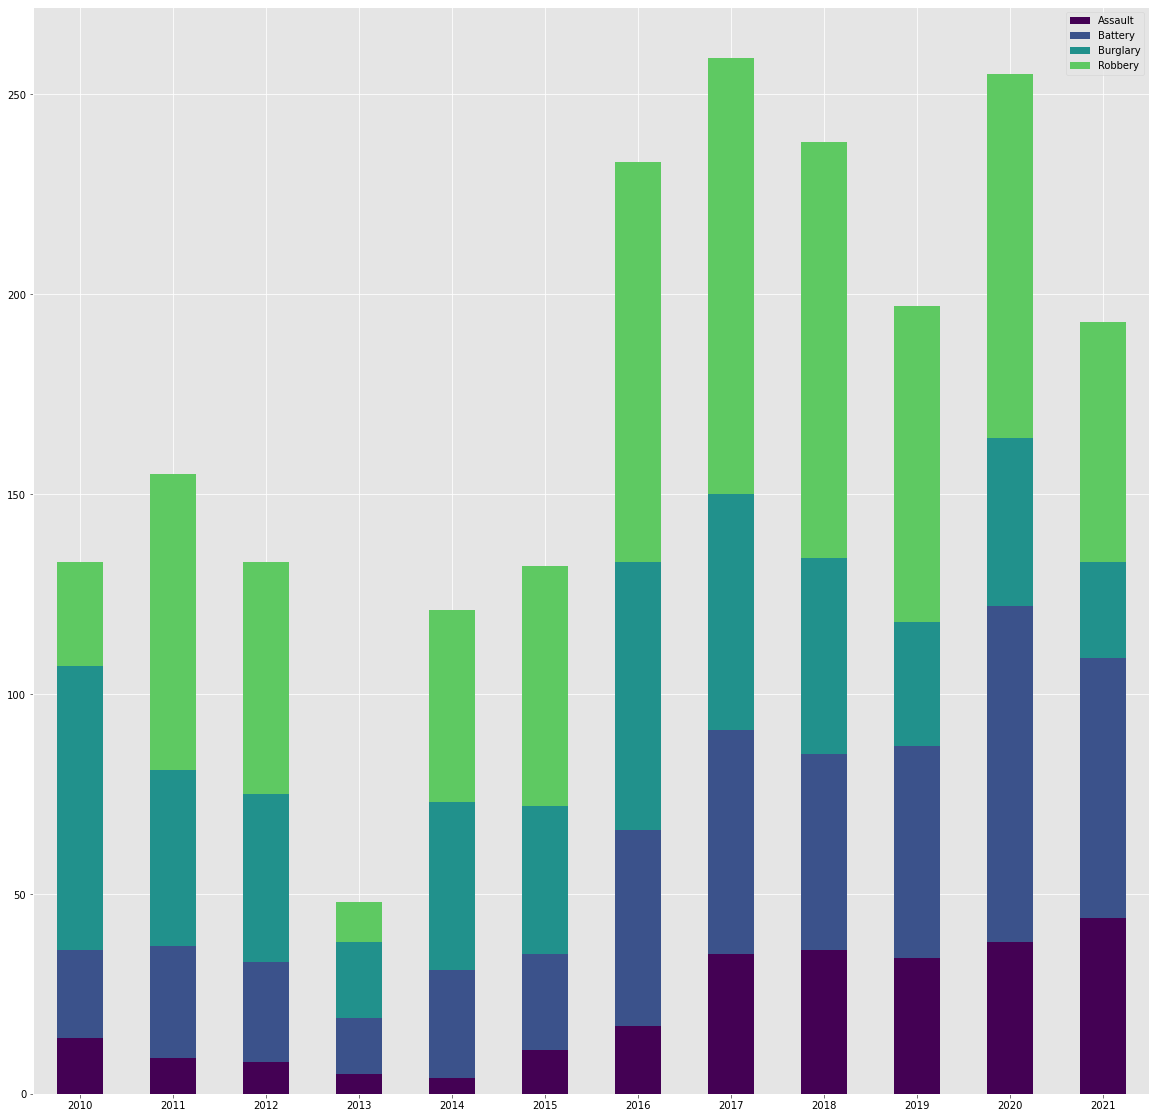

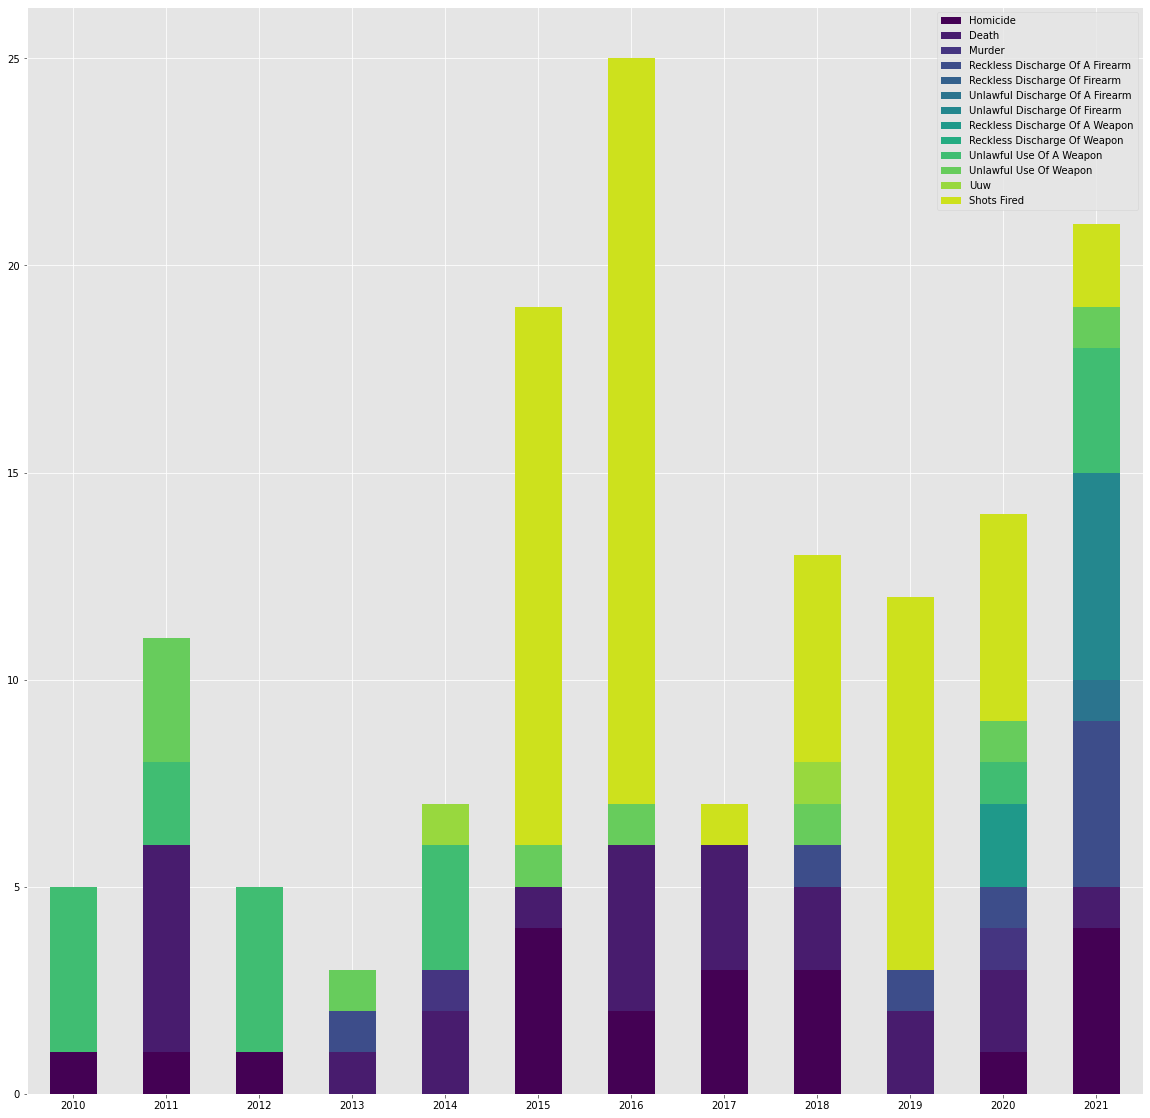

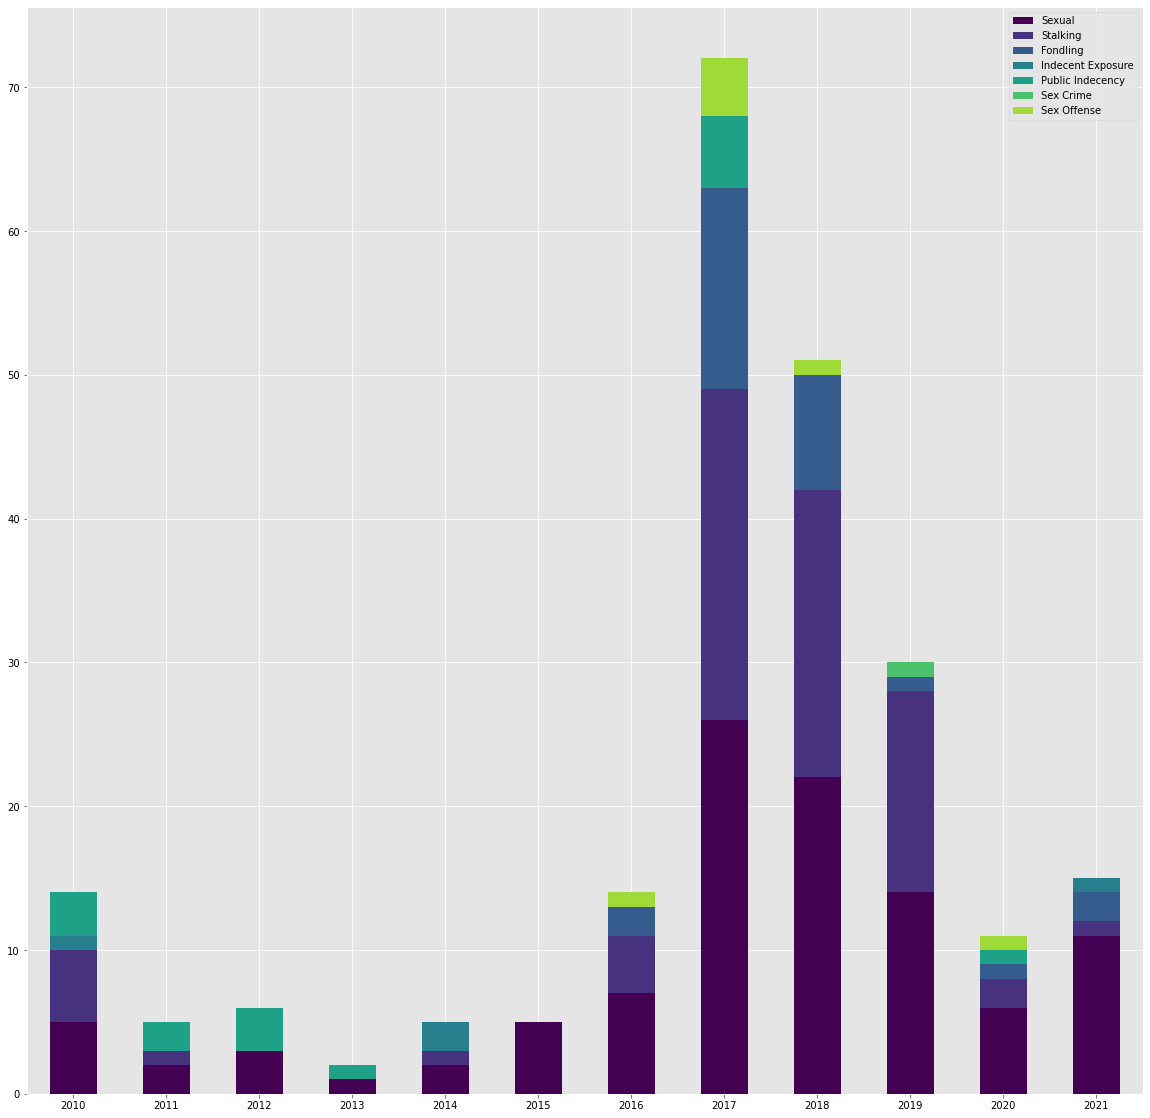

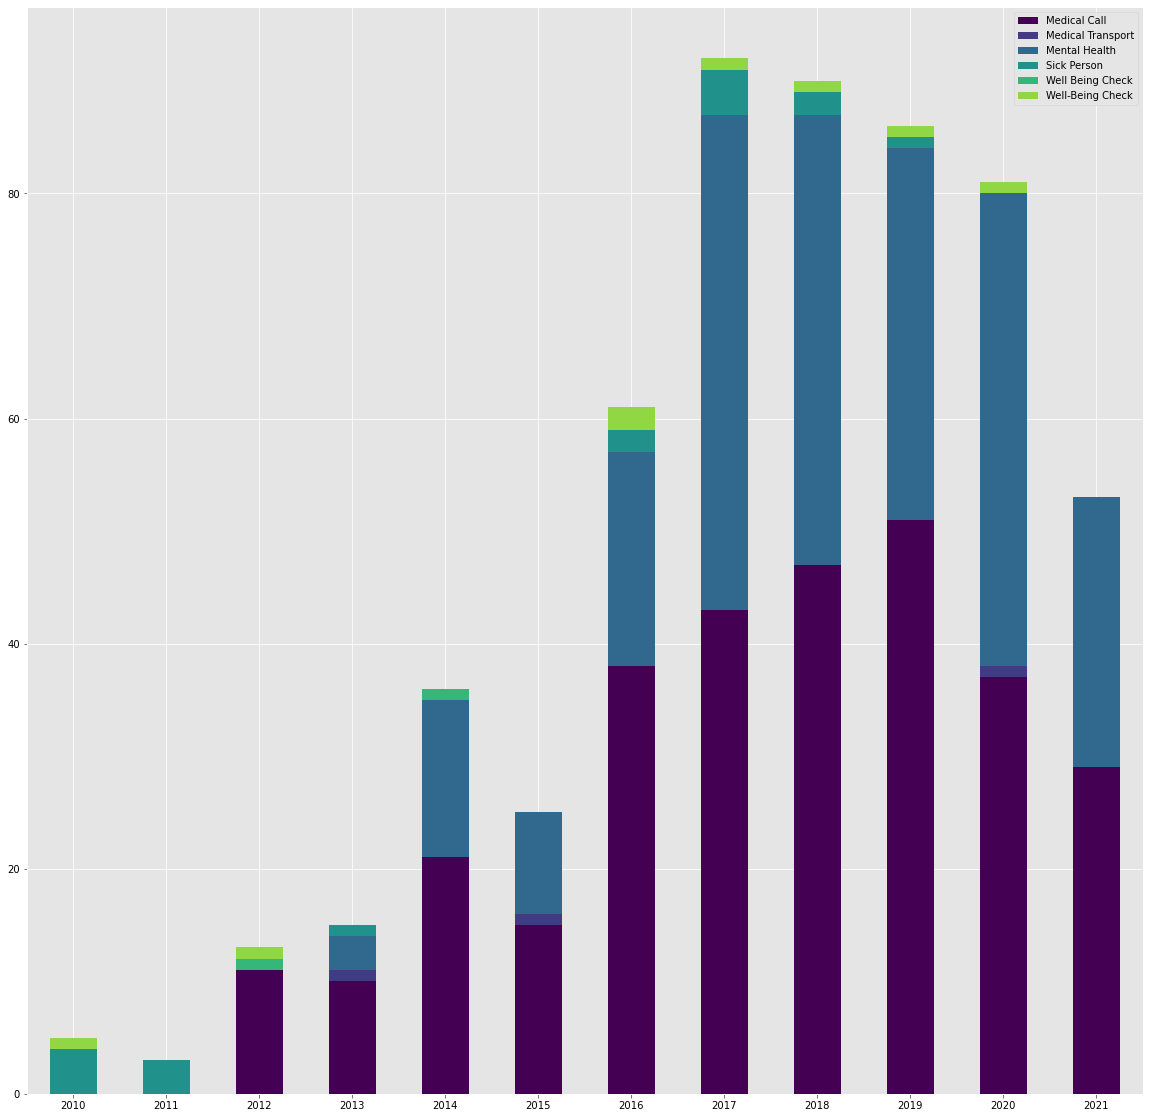

In [9]:
plot_incidents_barplot(cleaned, ['assault', 'battery', 'burglary', 'robbery'])
plot_incidents_barplot(cleaned, ['homicide', 'death', 'murder',
                                 'reckless discharge of a firearm',
                                 'reckless discharge of firearm',
                                 'unlawful discharge of a firearm',
                                 'unlawful discharge of firearm',
                                 'reckless discharge of a weapon',
                                 'reckless discharge of weapon',
                                 'unlawful use of a weapon',
                                 'unlawful use of weapon',
                                 'uuw',
                                 'shots fired'])
plot_incidents_barplot(cleaned, ['sexual', 'stalking', 'fondling', 'indecent exposure', 'public indecency',
                                 'sex crime', 'sex offense'])
plot_incidents_barplot(cleaned, ['medical call', 'medical transport', 'mental health', 'sick person',
                                 'well being check', 'well-being check'])

# plot_incidents_barplot(cleaned, ['Criminal Damage to Property'])
# plot_incidents_barplot(cleaned, ['Non-Criminal'])

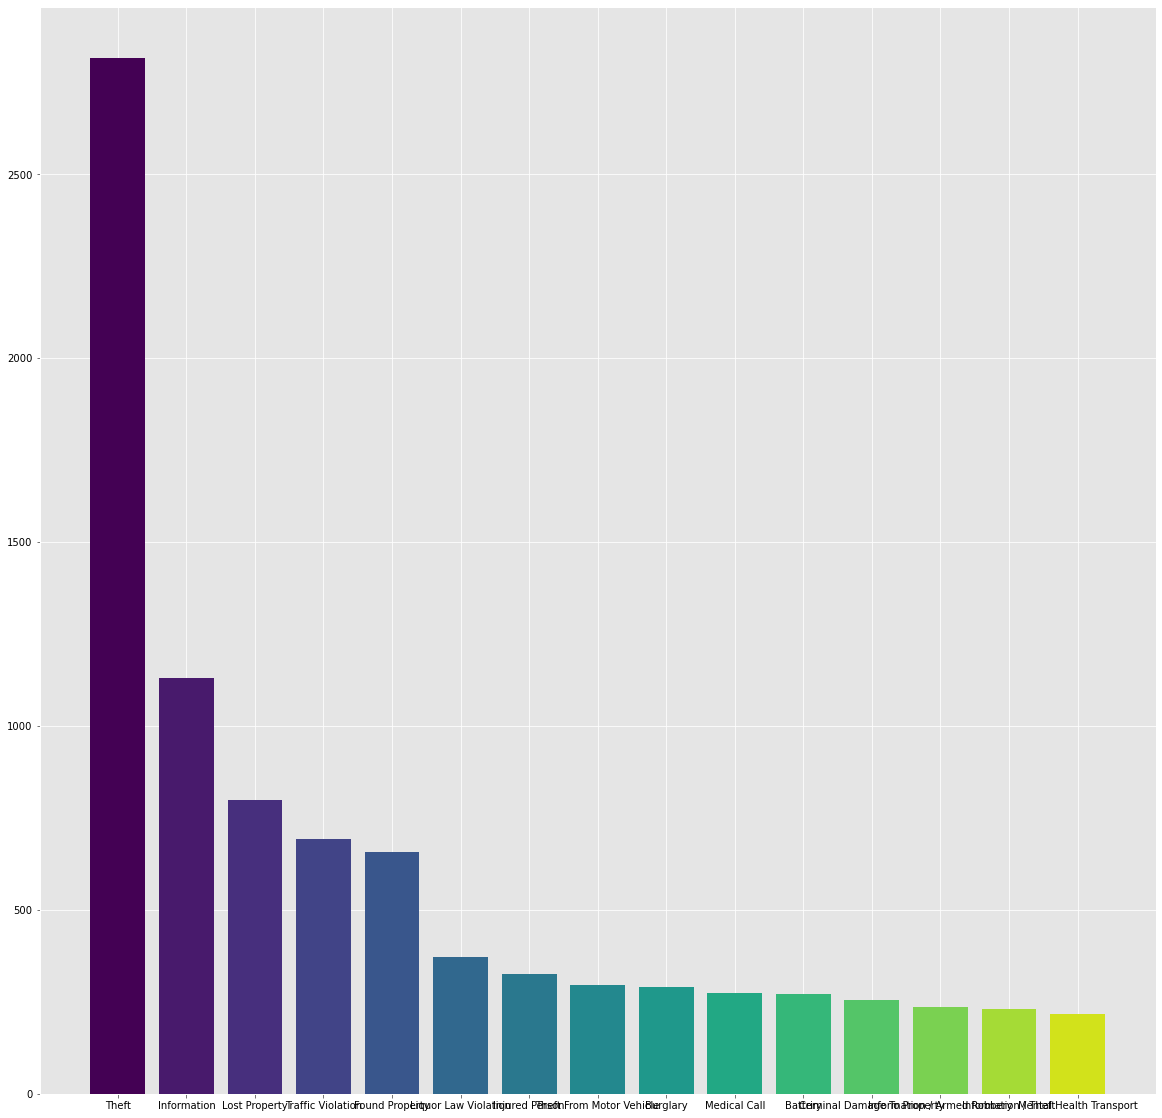

In [6]:
top_15 = pd.DataFrame(cleaned['Incident'].value_counts().head(15))
index = list(top_15.index)
for i in range(len(index)):
    index[i] = index[i].title()
height = list(top_15["Incident"])
plt.figure(figsize=(20, 20))
plt.xticks(rotation = 0, color = 'black', size = 10)
plt.yticks(color = 'black', size = 10)
plt.bar(index, height, color = gencolors(len(index)))
plt.show()

,count
2010-07-01,0
2010-07-02,0
2010-07-03,0
2010-07-04,0
2010-07-05,0
...,...
2021-10-30,0
2021-10-31,0
2021-11-01,0
2021-11-02,0


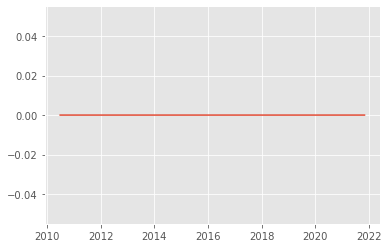

In [9]:
plot_incidents_vs_time(cleaned, 'Theft')